In [165]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm
import seaborn as sns
sns.set(color_codes=False)
import geopandas as gp
from scipy import stats, integrate
import datetime

pd.set_option('display.max_columns', 500)

In [2]:
store = pd.HDFStore("E:/Transit_Casa/Output/sfmuni_monthly_ts.h5")
store.items
bus = store.get('rs_tod')

In [13]:
bus09.to_csv('bus.csv')

In [12]:
len(bus)

1565864

In [4]:
bus09 = bus[bus["MONTH"].isin(pd.date_range('2009-01-01', '2009-12-01'))]

In [8]:
len(bus09)

124247

In [8]:
bus09.MONTH.unique()

array(['2009-06-01T00:00:00.000000000', '2009-07-01T00:00:00.000000000',
       '2009-08-01T00:00:00.000000000', '2009-09-01T00:00:00.000000000',
       '2009-10-01T00:00:00.000000000', '2009-11-01T00:00:00.000000000',
       '2009-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [14]:
bus09.head()

,MONTH,DOW,TOD,AGENCY_ID,ROUTE_SHORT_NAME,DIR,SEQ,NUMDAYS,OBSDAYS,TRIP_STOPS,OBS_TRIP_STOPS,WGT_TRIP_STOPS,STOP_ID,ROUTE_LONG_NAME,ROUTE_TYPE,TRIP_HEADSIGN,HEADWAY_S,FARE,STOPNAME,STOPNAME_AVL,STOP_LAT,STOP_LON,EOL,SOL,TIMEPOINT,ARRIVAL_TIME_DEV,DEPARTURE_TIME_DEV,DWELL_S,DWELL,RUNTIME_S,RUNTIME,TOTTIME_S,TOTTIME,SERVMILES_S,SERVMILES,RUNSPEED_S,RUNSPEED,TOTSPEED_S,TOTSPEED,ONTIME5,ON,OFF,LOAD_ARR,LOAD_DEP,PASSMILES,PASSHOURS,WAITHOURS,FULLFARE_REV,PASSDELAY_DEP,PASSDELAY_ARR,RDBRDNGS,DOORCYCLES,WHEELCHAIR,BIKERACK,CAPACITY,VC,CROWDED,CROWDHOURS
0,2009-06-01,1,0300-0559,SFMTA,1,0,1,12,6,2,0,2.810885,5056,CALIFORNIA,3,Geary & 33rd Av.,30.0,2.0,Howard St & Main St,HOWARD ST&MAIN ST E-NS/BZ,37.790410,-122.393520,0,1,1.0,-2.589167,-1.2975,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.000,0.000000,0.00,0.00,0.00,0.00,0.666667,4.119657,0.000000,1.300636,5.420293,0.000000,0.000000,0.769737,8.239314,0.000000,0.000000,0.0,6.760224,0.0,0.0,73.5,0.006614,0.0,0.0
1,2009-06-01,1,0300-0559,SFMTA,1,0,2,12,6,2,0,2.810885,5336,CALIFORNIA,3,Geary & 33rd Av.,30.0,2.0,Main St & Market St,MAIN ST&MARKET ST NE-MB/B,37.792530,-122.395670,0,0,0.0,-0.194167,0.4625,0.0,1.829286,4.24,9.304970,4.24,11.134256,0.382,0.536879,5.41,3.46,5.41,2.89,1.000000,1.160714,0.696429,5.420293,5.884579,1.035276,0.418748,0.261161,2.321429,3.549464,0.673214,0.0,1.625000,0.0,0.0,73.5,0.030423,0.0,0.0
2,2009-06-01,1,0300-0559,SFMTA,1,0,3,12,6,2,0,2.810885,4445,CALIFORNIA,3,Geary & 33rd Av.,30.0,2.0,Drumm St & California St,DRUMM ST&CALIFORNIA ST NE,37.793980,-122.396350,0,0,0.0,-0.125000,0.7575,0.0,2.401315,2.76,2.344340,2.76,4.745655,0.252,0.354172,5.48,9.06,5.48,4.48,0.916667,16.422087,0.232143,5.884579,22.074523,0.741457,0.377498,2.657059,32.844174,18.867710,13.905421,0.0,6.899876,0.0,0.0,73.5,0.033069,0.0,0.0
3,2009-06-01,1,0300-0559,SFMTA,1,0,5,12,6,2,0,2.810885,6294,CALIFORNIA,3,Geary & 33rd Av.,30.0,2.0,Sacramento St & Davis St,SACRAMENTO ST&DAVIS ST NE,37.794500,-122.397610,0,0,0.0,0.432500,0.5500,0.0,0.251369,2.20,2.175713,2.20,2.427083,0.198,0.278278,5.40,7.67,5.40,6.88,0.916667,0.666667,0.000000,22.074523,22.741189,2.185378,0.290461,0.250000,1.333333,0.453333,0.066667,0.0,1.464286,0.0,0.0,73.5,0.120370,0.0,0.0
4,2009-06-01,1,0300-0559,SFMTA,1,0,6,12,6,2,0,2.810885,6290,CALIFORNIA,3,Geary & 33rd Av.,30.0,2.0,Sacramento St & Battery St,SACRAMENTO ST&BATTERY ST,37.794135,-122.400179,0,0,0.0,-0.249167,-0.1475,0.0,0.274818,3.10,2.121527,3.10,2.396345,0.286,0.401957,5.54,11.37,5.54,10.06,0.583333,2.477552,0.333333,22.741189,24.885408,3.251990,0.336428,0.728739,4.955104,0.000000,0.000000,0.0,3.678465,0.0,0.0,73.5,0.125661,0.0,0.0


In [19]:
grouped = bus09.groupby(by = ['MONTH','DOW','TOD','AGENCY_ID','ROUTE_SHORT_NAME','DIR','SEQ']).first()

In [20]:
bus09.pivot?

In [32]:
route1 = bus09[(bus09['ROUTE_SHORT_NAME'] == '1') & (bus09['DIR'] == 1)]

In [33]:
print(len(route1))
route1.head()

2455


,MONTH,DOW,TOD,AGENCY_ID,ROUTE_SHORT_NAME,DIR,SEQ,NUMDAYS,OBSDAYS,TRIP_STOPS,OBS_TRIP_STOPS,WGT_TRIP_STOPS,STOP_ID,ROUTE_LONG_NAME,ROUTE_TYPE,TRIP_HEADSIGN,HEADWAY_S,FARE,STOPNAME,STOPNAME_AVL,STOP_LAT,STOP_LON,EOL,SOL,TIMEPOINT,ARRIVAL_TIME_DEV,DEPARTURE_TIME_DEV,DWELL_S,DWELL,RUNTIME_S,RUNTIME,TOTTIME_S,TOTTIME,SERVMILES_S,SERVMILES,RUNSPEED_S,RUNSPEED,TOTSPEED_S,TOTSPEED,ONTIME5,ON,OFF,LOAD_ARR,LOAD_DEP,PASSMILES,PASSHOURS,WAITHOURS,FULLFARE_REV,PASSDELAY_DEP,PASSDELAY_ARR,RDBRDNGS,DOORCYCLES,WHEELCHAIR,BIKERACK,CAPACITY,VC,CROWDED,CROWDHOURS
51,2009-06-01,1,0300-0559,SFMTA,1,1,1,12,10,5,1,5.0,4277,CALIFORNIA,3,Howard & Main,19.0,2.0,Geary Blvd & 33rd Ave,GEARY BLVD&33RD AVE NE-NS,37.779744,-122.493227,0,1,1.0,-0.800833,0.007333,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.000,0.000,0.00,0.00,0.00,0.00,0.616667,12.166667,0.0,3.000000,15.166667,0.000000,0.000000,2.406250,24.333333,5.8600,3.54,0.0,7.166667,0.0,0.0,88.2,0.009524,0.0,0.0
52,2009-06-01,1,0300-0559,SFMTA,1,1,2,12,10,5,1,5.0,3555,CALIFORNIA,3,Howard & Main,19.0,2.0,33rd Ave & Clement St,33RD AVE&CLEMENT ST SE-NS,37.781537,-122.493354,0,0,0.0,0.284833,0.305833,0.0,0.110000,3.00,4.386667,3.00,4.496667,0.620,0.620,12.40,8.48,12.40,8.27,0.716667,1.000000,0.0,15.166667,16.166667,1.880667,0.230139,0.072917,2.000000,1.3250,1.22,0.0,2.000000,0.0,0.0,88.2,0.048148,0.0,0.0
53,2009-06-01,1,0300-0559,SFMTA,1,1,3,12,10,5,1,5.0,3548,CALIFORNIA,3,Howard & Main,19.0,2.0,32nd Ave & Clement St,32ND AVE&CLEMENT ST NE-FS,37.781995,-122.492335,0,0,0.0,0.318333,0.342000,0.0,0.119167,1.85,1.885833,1.85,2.005000,0.430,0.430,13.95,13.68,13.95,12.87,0.750000,0.500000,0.0,16.166667,16.666667,1.390333,0.101611,0.072917,1.000000,0.4500,0.39,0.0,1.916667,0.0,0.0,88.2,0.051323,0.0,0.0
54,2009-06-01,1,0300-0559,SFMTA,1,1,4,12,10,5,1,5.0,3546,CALIFORNIA,3,Howard & Main,19.0,2.0,32nd Ave & California St,32ND AVE&CALIFORNIA ST SE,37.783419,-122.492442,0,0,0.0,0.374833,0.374833,0.0,0.000000,2.10,2.256667,2.10,2.256667,0.490,0.490,14.00,13.03,14.00,13.03,0.750000,0.000000,0.0,16.666667,16.666667,1.633333,0.127306,0.000000,0.000000,0.0000,0.00,0.0,0.000000,0.0,0.0,88.2,0.052910,0.0,0.0
55,2009-06-01,1,0300-0559,SFMTA,1,1,5,12,10,5,1,5.0,3844,CALIFORNIA,3,Howard & Main,19.0,2.0,California St & 30th Ave,CALIFORNIA ST&30TH AVE SE,37.783578,-122.490087,0,0,0.0,0.269500,0.346333,0.0,0.386667,3.00,2.470833,3.00,2.857500,0.705,0.705,14.10,17.12,14.10,14.80,0.750000,3.666667,0.0,16.666667,20.333333,2.350000,0.175250,0.458333,7.333333,4.7325,4.39,0.0,5.833333,0.0,0.0,88.2,0.052910,0.0,0.0


In [222]:
pivot = route1.pivot_table(values = 'LOAD_DEP',index = 'STOPNAME',columns = 'TOD',aggfunc = 'sum',margins = False, fill_value = 0)

In [143]:
bus09.head()

,MONTH,DOW,TOD,AGENCY_ID,ROUTE_SHORT_NAME,DIR,SEQ,NUMDAYS,OBSDAYS,TRIP_STOPS,OBS_TRIP_STOPS,WGT_TRIP_STOPS,STOP_ID,ROUTE_LONG_NAME,ROUTE_TYPE,TRIP_HEADSIGN,HEADWAY_S,FARE,STOPNAME,STOPNAME_AVL,STOP_LAT,STOP_LON,EOL,SOL,TIMEPOINT,ARRIVAL_TIME_DEV,DEPARTURE_TIME_DEV,DWELL_S,DWELL,RUNTIME_S,RUNTIME,TOTTIME_S,TOTTIME,SERVMILES_S,SERVMILES,RUNSPEED_S,RUNSPEED,TOTSPEED_S,TOTSPEED,ONTIME5,ON,OFF,LOAD_ARR,LOAD_DEP,PASSMILES,PASSHOURS,WAITHOURS,FULLFARE_REV,PASSDELAY_DEP,PASSDELAY_ARR,RDBRDNGS,DOORCYCLES,WHEELCHAIR,BIKERACK,CAPACITY,VC,CROWDED,CROWDHOURS
0,2009-06-01,1,0300-0559,SFMTA,1,0,1,12,6,2,0,2.810885,5056,CALIFORNIA,3,Geary & 33rd Av.,30.0,2.0,Howard St & Main St,HOWARD ST&MAIN ST E-NS/BZ,37.790410,-122.393520,0,1,1.0,-2.589167,-1.2975,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.000,0.000000,0.00,0.00,0.00,0.00,0.666667,4.119657,0.000000,1.300636,5.420293,0.000000,0.000000,0.769737,8.239314,0.000000,0.000000,0.0,6.760224,0.0,0.0,73.5,0.006614,0.0,0.0
1,2009-06-01,1,0300-0559,SFMTA,1,0,2,12,6,2,0,2.810885,5336,CALIFORNIA,3,Geary & 33rd Av.,30.0,2.0,Main St & Market St,MAIN ST&MARKET ST NE-MB/B,37.792530,-122.395670,0,0,0.0,-0.194167,0.4625,0.0,1.829286,4.24,9.304970,4.24,11.134256,0.382,0.536879,5.41,3.46,5.41,2.89,1.000000,1.160714,0.696429,5.420293,5.884579,1.035276,0.418748,0.261161,2.321429,3.549464,0.673214,0.0,1.625000,0.0,0.0,73.5,0.030423,0.0,0.0
2,2009-06-01,1,0300-0559,SFMTA,1,0,3,12,6,2,0,2.810885,4445,CALIFORNIA,3,Geary & 33rd Av.,30.0,2.0,Drumm St & California St,DRUMM ST&CALIFORNIA ST NE,37.793980,-122.396350,0,0,0.0,-0.125000,0.7575,0.0,2.401315,2.76,2.344340,2.76,4.745655,0.252,0.354172,5.48,9.06,5.48,4.48,0.916667,16.422087,0.232143,5.884579,22.074523,0.741457,0.377498,2.657059,32.844174,18.867710,13.905421,0.0,6.899876,0.0,0.0,73.5,0.033069,0.0,0.0
3,2009-06-01,1,0300-0559,SFMTA,1,0,5,12,6,2,0,2.810885,6294,CALIFORNIA,3,Geary & 33rd Av.,30.0,2.0,Sacramento St & Davis St,SACRAMENTO ST&DAVIS ST NE,37.794500,-122.397610,0,0,0.0,0.432500,0.5500,0.0,0.251369,2.20,2.175713,2.20,2.427083,0.198,0.278278,5.40,7.67,5.40,6.88,0.916667,0.666667,0.000000,22.074523,22.741189,2.185378,0.290461,0.250000,1.333333,0.453333,0.066667,0.0,1.464286,0.0,0.0,73.5,0.120370,0.0,0.0
4,2009-06-01,1,0300-0559,SFMTA,1,0,6,12,6,2,0,2.810885,6290,CALIFORNIA,3,Geary & 33rd Av.,30.0,2.0,Sacramento St & Battery St,SACRAMENTO ST&BATTERY ST,37.794135,-122.400179,0,0,0.0,-0.249167,-0.1475,0.0,0.274818,3.10,2.121527,3.10,2.396345,0.286,0.401957,5.54,11.37,5.54,10.06,0.583333,2.477552,0.333333,22.741189,24.885408,3.251990,0.336428,0.728739,4.955104,0.000000,0.000000,0.0,3.678465,0.0,0.0,73.5,0.125661,0.0,0.0


In [43]:
sns.heatmap()

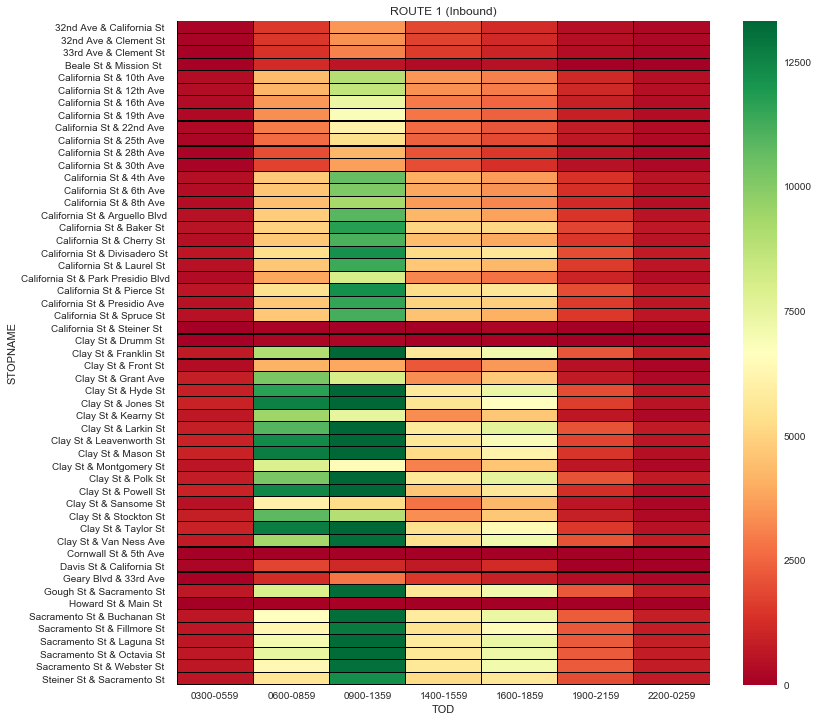

In [194]:
#Creates Heatmap.

#fig size numbers are in inches on a sheet of paper.
plt.figure(figsize =(10, 10))
plt.title('ROUTE 1 (Inbound)')
plt.tight_layout()
plt.yticks = Heatmap.yaxis
Heatmap = sns.heatmap(pivot, robust = True, cmap = 'RdYlGn',fmt = '.1f',annot = False,
                      linecolor = 'black',linewidth = 0.1,cbar = True,square = False, 
                      xticklabels = True, yticklabels = True)



In [178]:
figure = Heatmap.get_figure()

In [ ]:
bus09.ROUTE_SHORT_NAME

In [163]:
figure.savefig('Route1_Inbound.jpg',bbox_inches='tight')


In [169]:
bus13 = bus[bus["MONTH"].isin(pd.date_range('2013-01-01', '2014-12-01'))]

In [216]:
bus13.head()

,MONTH,DOW,TOD,AGENCY_ID,ROUTE_SHORT_NAME,DIR,SEQ,NUMDAYS,OBSDAYS,TRIP_STOPS,OBS_TRIP_STOPS,WGT_TRIP_STOPS,STOP_ID,ROUTE_LONG_NAME,ROUTE_TYPE,TRIP_HEADSIGN,HEADWAY_S,FARE,STOPNAME,STOPNAME_AVL,STOP_LAT,STOP_LON,EOL,SOL,TIMEPOINT,ARRIVAL_TIME_DEV,DEPARTURE_TIME_DEV,DWELL_S,DWELL,RUNTIME_S,RUNTIME,TOTTIME_S,TOTTIME,SERVMILES_S,SERVMILES,RUNSPEED_S,RUNSPEED,TOTSPEED_S,TOTSPEED,ONTIME5,ON,OFF,LOAD_ARR,LOAD_DEP,PASSMILES,PASSHOURS,WAITHOURS,FULLFARE_REV,PASSDELAY_DEP,PASSDELAY_ARR,RDBRDNGS,DOORCYCLES,WHEELCHAIR,BIKERACK,CAPACITY,VC,CROWDED,CROWDHOURS
1244874,2013-01-01,1,0300-0559,SFMTA,1,0,4,21,13,2,0,2.816745,4015,CALIFORNIA,3,the Richmond District,30.0,2.0,Clay St & Drumm St,CLAY ST&DRUMM ST SW-NS/BZ,37.795415,-122.396996,0,1,1.0,-9.578462,-2.150769,0.0,19.726599,0.00,0.000000,0.00,19.726599,0.000,0.000000,0.00,0.00,0.00,0.00,0.576923,12.138192,0.000000,0.572827,12.711020,0.000000,1.202545,1.171571,24.276385,14.079054,10.017335,0.606255,9.918918,0.0,0.000000,72.692308,0.003053,0.0,0.0
1244875,2013-01-01,1,0300-0559,SFMTA,1,0,5,21,13,2,0,2.816745,6294,CALIFORNIA,3,the Richmond District,30.0,2.0,Sacramento St & Davis St,SACRAMENTO ST&DAVIS ST NE-NS,37.794500,-122.397610,0,0,0.0,-2.058077,-1.646154,0.0,1.133525,2.26,3.524717,2.26,4.658242,0.238,0.335193,6.32,5.71,6.32,4.32,0.500000,10.068564,0.107880,12.461832,22.422517,1.482958,0.462938,3.028888,20.137129,7.976490,7.079415,0.406000,3.880083,0.0,0.249187,72.692308,0.068987,0.0,0.0
1244876,2013-01-01,1,0300-0559,SFMTA,1,0,6,21,13,2,0,2.816745,6290,CALIFORNIA,3,the Richmond District,30.0,2.0,Sacramento St & Battery St,SACRAMENTO ST&BATTERY ST NW-,37.794135,-122.400179,0,0,0.0,-2.114615,-1.998462,0.0,0.298658,2.44,2.053109,2.44,2.351768,0.286,0.402794,7.03,11.77,7.03,10.28,0.423077,1.688703,2.564219,24.847536,23.972019,3.553198,0.354528,0.294686,3.377405,0.092777,0.000000,0.000000,3.159538,0.0,0.000000,72.692308,0.139194,0.0,0.0
1244877,2013-01-01,1,0300-0559,SFMTA,1,0,7,21,13,2,0,2.816745,6314,CALIFORNIA,3,the Richmond District,30.0,2.0,Sacramento St & Sansome St,SACRAMENTO ST&SANSOME ST NW-,37.794030,-122.401551,0,0,1.0,1.523077,1.612308,0.0,0.257419,1.30,13.321439,1.30,13.578858,0.150,0.211256,6.92,0.95,6.92,0.93,0.423077,1.012255,0.845427,28.457393,28.624221,2.134304,3.826657,0.131479,2.024509,0.000000,0.000000,0.000000,3.093603,0.0,0.000000,72.692308,0.157509,0.0,0.0
1244878,2013-01-01,1,0300-0559,SFMTA,1,0,8,21,13,2,0,2.816745,6307,CALIFORNIA,3,the Richmond District,30.0,2.0,Sacramento St & Montgomery St,SACRAMENTO ST&MONTGOMERY ST,37.793842,-122.403068,0,0,0.0,1.377692,1.452308,0.0,0.223144,1.56,1.598556,1.56,1.821700,0.168,0.236607,6.46,8.88,6.46,7.79,0.423077,0.714135,0.249187,28.624221,29.089168,2.404435,0.319123,0.101232,1.428269,0.573131,0.540737,0.000000,2.358164,0.0,0.107880,72.692308,0.158120,0.0,0.0


In [217]:
bus_diff['ON_09'] = bus09.ON
bus_diff['ON_13'] = bus13.ON
bus_diff['LOAD_09'] = bus09.LOAD_DEP
bus_diff['LOAD_13'] = bus13.LOAD_DEP

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

In [211]:
bus09['ON_DIFF'] = bus09.ON - bus13.ON

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [208]:
bus09.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219479 entries, 0 to 219478
Data columns (total 59 columns):
MONTH                 219479 non-null datetime64[ns]
DOW                   219479 non-null int64
TOD                   219479 non-null object
AGENCY_ID             219479 non-null object
ROUTE_SHORT_NAME      219479 non-null object
DIR                   219479 non-null int64
SEQ                   219479 non-null int64
NUMDAYS               219479 non-null int64
OBSDAYS               219479 non-null int64
TRIP_STOPS            219479 non-null int64
OBS_TRIP_STOPS        219479 non-null int64
WGT_TRIP_STOPS        214356 non-null float64
STOP_ID               219479 non-null int64
ROUTE_LONG_NAME       219479 non-null object
ROUTE_TYPE            219479 non-null int64
TRIP_HEADSIGN         219479 non-null object
HEADWAY_S             212823 non-null float64
FARE                  219479 non-null float64
STOPNAME              219479 non-null object
STOPNAME_AVL          219479 non

In [172]:
bus09['LOAD_DIFF'] = bus09['LOAD_DEP'] - bus13['LOAD_DEP']

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [218]:
bus_diff.head()

,ROUTE_SHORT_NAME,DIR,STOPNAME,TOD,LOAD_DIFF,ON_09,ON_13,LOAD_09,LOAD_13
0,1,0,Howard St & Main St,0300-0559,NaN,4.119657,NaN,5.420293,NaN
1,1,0,Main St & Market St,0300-0559,NaN,1.160714,NaN,5.884579,NaN
2,1,0,Drumm St & California St,0300-0559,NaN,16.422087,NaN,22.074523,NaN
3,1,0,Sacramento St & Davis St,0300-0559,NaN,0.666667,NaN,22.741189,NaN
4,1,0,Sacramento St & Battery St,0300-0559,NaN,2.477552,NaN,24.885408,NaN


In [ ]:
pivot = route1.pivot_table(values = 'LOAD_DIFF',index = 'STOPNAME',columns = 'TOD',aggfunc = 'sum',margins = False, fill_value = 0)

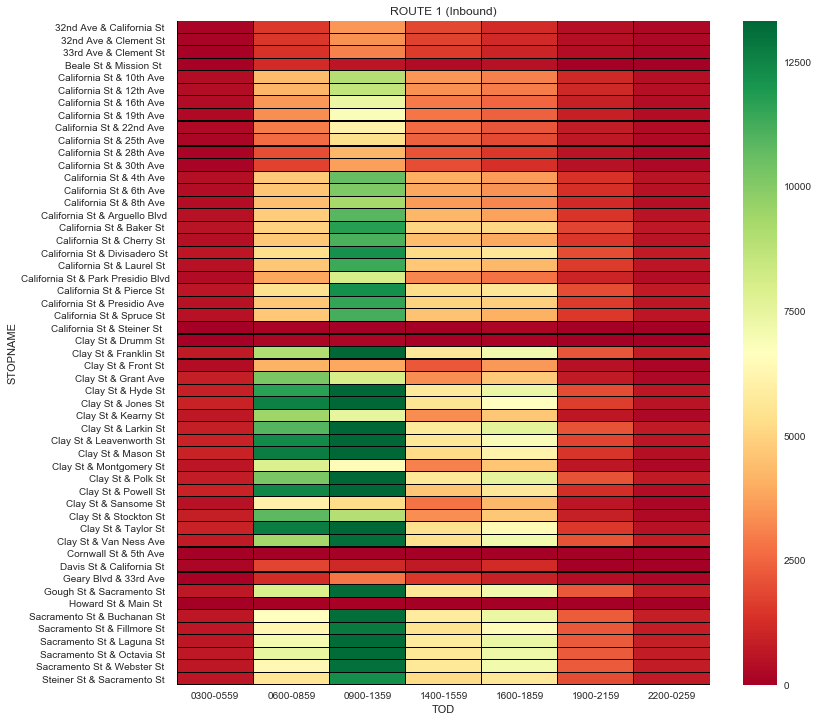

In [179]:
figure

In [186]:
plt.yticks(rotation=45)

TypeError: 'YAxis' object is not callable

In [192]:
locs, labels = plt.yticks()
plt.setp(labels, rotation=45)

TypeError: 'YAxis' object is not callable

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gp


H5_INFILE = "E:/Transit_Casa/Output/sfmuni_monthly_ts.h5"
BASE_START_DATE = '2009-01-01'
BASE_END_DATE = '2009-12-01'
FUTURE_START_DATE = '2013-01-01'
FUTURE_END_DATE = '2013-12-01'
DIRECTIONS = [1,0]



def create_heatmap(df,direction):
    plt.figure(figsize =(10, 10))
    if direction == 1:
        plt.title('ROUTE ' + str(route) + ' (Inbound)')
        plt.tight_layout()
        Heatmap = sns.heatmap(df, robust = True, cmap = 'RdYlGn',fmt = '.1f',annot = False,
                              linecolor = 'black',linewidth = 0.1,cbar = True,square = False, 
                              xticklabels = True, yticklabels = True)
    elif direction == 0:
        plt.title('ROUTE ' + str(route) + ' (Outbound)')
        plt.tight_layout()
        Heatmap = sns.heatmap(df, robust = True, cmap = 'RdYlGn',fmt = '.1f',annot = False,
                              linecolor = 'black',linewidth = 0.1,cbar = True,square = False, 
                              xticklabels = True, yticklabels = True)

    else:
        print('Bad Direction!')

    return Heatmap
 
 
    
if __name__ == "__main__":

    store = pd.HDFStore(H5_INFILE)
    bus = store.get('rs_tod')
    
    bus09 = bus[bus["MONTH"].isin(pd.date_range(BASE_START_DATE,BASE_END_DATE))]
    bus13 = bus[bus['MONTH'].isin(pd.date_range(FUTURE_START_DATE,FUTURE_END_DATE))]
    
    
    bus_diff = pd.merge(bus09,bus13,how = 'inner',
                        on =['DOW','TOD','AGENCY_ID','ROUTE_SHORT_NAME','DIR','SEQ'],suffixes = ('_09','_13'))
    bus_diff['LOAD_DIFF'] = bus_diff['LOAD_DEP_13'] - bus_diff['LOAD_DEP_09']
    
    bus_dfs = [bus_diff]
    count = 0
    for bus_df in bus_dfs:
        print('Started new heatmaps dataframe')

        for route in bus_df['ROUTE_SHORT_NAME'].unique():
            print('Started route ' + route)
            
            for direction in DIRECTIONS:
                route_df = bus_df[(bus_df['ROUTE_SHORT_NAME'] == route) & (bus_df['DIR'] == direction)]
                
                
                if len(route_df) == 0:
                    print('Route ' + route + ' in ' + str(direction) + ' direction does not run')
                else:
                    if count != 0: 
                        pivot = route_df.pivot_table(values = 'LOAD_DEP',index = 'STOPNAME',
                                              columns = 'TOD',aggfunc = 'sum',margins = False, fill_value = 0)
                                              
                        heatmap = create_heatmap(pivot,direction)
                        figure = heatmap.get_figure()
                    else:
                        pivot = route_df.pivot_table(values = 'LOAD_DIFF',index = 'SEQ',
                                              columns = 'TOD',aggfunc = 'sum',margins = False, fill_value = 0)
                                              
                        heatmap = create_heatmap(pivot,direction)
                        figure = heatmap.get_figure()
    
                    if count == 2:
                        figure.savefig('E:/Transit-Casa-Alex/Output/HeatMaps/'  + '2009 ' + str(route) + '_' + 'Route ' +
                        str(direction) + '.jpg',bbox_inches='tight',pad_inches = 6)
                    elif count == 3:
                        figure.savefig('E:/Transit-Casa-Alex/Output/HeatMaps/'  + ' 2013 ' + str(route) + '_' + 'Route ' +
                        str(direction) + '.jpg',bbox_inches='tight',pad_inches = 6)
                    elif count == 0:
                        figure.savefig('E:/Transit-Casa-Alex/Output/HeatMaps/'  + 'Diff ' + str(route) + '_' + 'Route ' +
                        str(direction) + '.jpg',bbox_inches='tight')
                    else:
                        print('Something is wrong')
                        
                    plt.close('all')
        count = count + 1        
            
                
    print('ALL DONE TIME FOR YOUTUBE VIDEOS!')

Started new heatmaps dataframe
Started route 1
Started route 10
Started route 12
Started route 14
Started route 18
Started route 19
Started route 2
Started route 21
Started route 22
Started route 23
Started route 24
Started route 27
Started route 28
Started route 29
Started route 30
Started route 31
Started route 33
Started route 36
Started route 38
Started route 41
Started route 43
Started route 44
Started route 45
Started route 47
Started route 48
Started route 49
Started route 5
Started route 54
Started route 6
Started route 66
Started route 71
Started route 9
Started route 108
Started route 14L
Started route 14X
Started route 17
Started route 1AX
Started route 1BX
Started route 28L
Started route 3
Started route 30X
Started route 31AX
Started route 31BX
Started route 35
Started route 37
Started route 38AX
Started route 38BX
Started route 38L
Started route 52
Started route 56
Started route 67
Started route 71L
Started route 88
Started route 39
Started route 90
Started route 91
Starte

In [219]:
pivot

TOD,0600-0859,0900-1359,1400-1559,1600-1859
STOPNAME,,,,
11th St & Harrison St,0,0,0,0
11th St & Market St,0,0,0,0
Bay Shore Blvd & Arleta Ave,0,0,0,0
Bay Shore Blvd & Cortland Ave,0,0,0,0
Main St & Mission St,0,0,0,0
Market St & 2nd St,0,0,0,0
Market St & 5th St,0,0,0,0
Market St & 7th St,0,0,0,0
Market St & Battery St,0,0,0,0


In [223]:
pivot

TOD,0300-0559,0600-0859,0900-1359,1400-1559,1600-1859,1900-2159,2200-0259
STOPNAME,,,,,,,
32nd Ave & California St,108.086806,1553.837501,3509.993743,1822.198289,1217.696137,467.263684,219.809231
32nd Ave & Clement St,107.527282,1483.336778,3402.197121,1761.700608,1153.499558,457.956379,212.241750
33rd Ave & Clement St,98.942575,1366.445425,3075.688399,1598.724161,1028.237818,413.502217,188.680212
Beale St & Mission St,76.856990,1207.865979,608.861770,357.843517,504.340002,0.000000,0.000000
California St & 10th Ave,382.986874,4331.782866,8946.875793,3504.006412,3087.672318,1139.942192,435.404221
California St & 12th Ave,368.752366,4187.640340,8603.396254,3403.381371,2981.792945,1103.100263,429.400058
California St & 16th Ave,326.405029,3574.262843,7321.759267,2960.806585,2514.406015,933.336466,370.617868
California St & 19th Ave,290.847070,3361.176596,6858.804089,2860.228917,2397.582587,889.487297,365.950801
California St & 22nd Ave,268.551664,2969.567849,6104.597346,2631.983988,2150.465210,780.860701,334.825740


In [224]:
len(bus09)

219479

In [225]:
len(bus13)

320990

In [226]:
bus_diff.LOAD_DIFF.unique()

array([ nan])

In [227]:
bus_09_grouped = bus09.groupby(by = ['MONTH','DOW','TOD','AGENCY_ID','ROUTE_SHORT_NAME','DIR','SEQ']).first()

In [228]:
bus_13_grouped = bus13.groupby(by = ['MONTH','DOW','TOD','AGENCY_ID','ROUTE_SHORT_NAME','DIR','SEQ']).first()

In [254]:
merge = pd.merge(bus09,bus13,how = 'inner',on =['DOW','TOD','AGENCY_ID','ROUTE_SHORT_NAME','DIR','SEQ'],suffixes = ('_09','_13'))

In [255]:
len(merge)

1992460

In [253]:
len(merge)

1341353

In [246]:
merge.head()

,MONTH_09,DOW,TOD,AGENCY_ID,ROUTE_SHORT_NAME,DIR,SEQ,NUMDAYS_09,OBSDAYS_09,TRIP_STOPS_09,OBS_TRIP_STOPS_09,WGT_TRIP_STOPS_09,STOP_ID_09,ROUTE_LONG_NAME_09,ROUTE_TYPE_09,TRIP_HEADSIGN_09,HEADWAY_S_09,FARE_09,STOPNAME_09,STOPNAME_AVL_09,STOP_LAT_09,STOP_LON_09,EOL_09,SOL_09,TIMEPOINT_09,ARRIVAL_TIME_DEV_09,DEPARTURE_TIME_DEV_09,DWELL_S_09,DWELL_09,RUNTIME_S_09,RUNTIME_09,TOTTIME_S_09,TOTTIME_09,SERVMILES_S_09,SERVMILES_09,RUNSPEED_S_09,RUNSPEED_09,TOTSPEED_S_09,TOTSPEED_09,ONTIME5_09,ON_09,OFF_09,LOAD_ARR_09,LOAD_DEP_09,PASSMILES_09,PASSHOURS_09,WAITHOURS_09,FULLFARE_REV_09,PASSDELAY_DEP_09,PASSDELAY_ARR_09,RDBRDNGS_09,DOORCYCLES_09,WHEELCHAIR_09,BIKERACK_09,CAPACITY_09,VC_09,CROWDED_09,CROWDHOURS_09,LOAD_DIFF,ON_DIFF,MONTH_13,NUMDAYS_13,OBSDAYS_13,TRIP_STOPS_13,OBS_TRIP_STOPS_13,WGT_TRIP_STOPS_13,STOP_ID_13,ROUTE_LONG_NAME_13,ROUTE_TYPE_13,TRIP_HEADSIGN_13,HEADWAY_S_13,FARE_13,STOPNAME_13,STOPNAME_AVL_13,STOP_LAT_13,STOP_LON_13,EOL_13,SOL_13,TIMEPOINT_13,ARRIVAL_TIME_DEV_13,DEPARTURE_TIME_DEV_13,DWELL_S_13,DWELL_13,RUNTIME_S_13,RUNTIME_13,TOTTIME_S_13,TOTTIME_13,SERVMILES_S_13,SERVMILES_13,RUNSPEED_S_13,RUNSPEED_13,TOTSPEED_S_13,TOTSPEED_13,ONTIME5_13,ON_13,OFF_13,LOAD_ARR_13,LOAD_DEP_13,PASSMILES_13,PASSHOURS_13,WAITHOURS_13,FULLFARE_REV_13,PASSDELAY_DEP_13,PASSDELAY_ARR_13,RDBRDNGS_13,DOORCYCLES_13,WHEELCHAIR_13,BIKERACK_13,CAPACITY_13,VC_13,CROWDED_13,CROWDHOURS_13
0,2009-06-01,1,0300-0559,SFMTA,1,0,5,12,6,2,0,2.810885,6294,CALIFORNIA,3,Geary & 33rd Av.,30.0,2.0,Sacramento St & Davis St,SACRAMENTO ST&DAVIS ST NE,37.7945,-122.39761,0,0,0.0,0.4325,0.55,0.0,0.251369,2.2,2.175713,2.2,2.427083,0.198,0.278278,5.4,7.67,5.4,6.88,0.916667,0.666667,0.0,22.074523,22.741189,2.185378,0.290461,0.25,1.333333,0.453333,0.066667,0.0,1.464286,0.0,0.0,73.5,0.12037,0.0,0.0,NaN,NaN,2013-01-01,21,13,2,0,2.816745,6294,CALIFORNIA,3,the Richmond District,30.0,2.0,Sacramento St & Davis St,SACRAMENTO ST&DAVIS ST NE-NS,37.7945,-122.39761,0,0,0.0,-2.058077,-1.646154,0.0,1.133525,2.26,3.524717,2.26,4.658242,0.238,0.335193,6.32,5.71,6.32,4.32,0.500000,10.068564,0.107880,12.461832,22.422517,1.482958,0.462938,3.028888,20.137129,7.976490,7.079415,0.406000,3.880083,0.0,0.249187,72.692308,0.068987,0.0,0.0
1,2009-06-01,1,0300-0559,SFMTA,1,0,5,12,6,2,0,2.810885,6294,CALIFORNIA,3,Geary & 33rd Av.,30.0,2.0,Sacramento St & Davis St,SACRAMENTO ST&DAVIS ST NE,37.7945,-122.39761,0,0,0.0,0.4325,0.55,0.0,0.251369,2.2,2.175713,2.2,2.427083,0.198,0.278278,5.4,7.67,5.4,6.88,0.916667,0.666667,0.0,22.074523,22.741189,2.185378,0.290461,0.25,1.333333,0.453333,0.066667,0.0,1.464286,0.0,0.0,73.5,0.12037,0.0,0.0,NaN,NaN,2013-02-01,19,8,2,0,2.725148,6294,CALIFORNIA,3,the Richmond District,30.0,2.0,Sacramento St & Davis St,SACRAMENTO ST&DAVIS ST NE-NS,37.7945,-122.39761,0,0,0.0,-1.316875,-1.233750,0.0,0.193795,2.26,4.640702,2.26,4.834497,0.238,0.324293,6.32,4.19,6.32,4.02,0.312500,2.536274,0.000000,21.660543,24.196817,2.577605,0.606229,0.610366,5.072548,0.180000,0.000000,0.500000,1.585054,0.0,0.000000,78.750000,0.123016,0.0,0.0
2,2009-06-01,1,0300-0559,SFMTA,1,0,5,12,6,2,0,2.810885,6294,CALIFORNIA,3,Geary & 33rd Av.,30.0,2.0,Sacramento St & Davis St,SACRAMENTO ST&DAVIS ST NE,37.7945,-122.39761,0,0,0.0,0.4325,0.55,0.0,0.251369,2.2,2.175713,2.2,2.427083,0.198,0.278278,5.4,7.67,5.4,6.88,0.916667,0.666667,0.0,22.074523,22.741189,2.185378,0.290461,0.25,1.333333,0.453333,0.066667,0.0,1.464286,0.0,0.0,73.5,0.12037,0.0,0.0,NaN,NaN,2013-03-01,20,7,2,0,2.775838,6294,CALIFORNIA,3,the Richmond District,30.0,2.0,Sacramento St & Davis St,SACRAMENTO ST&DAVIS ST NE-NS,37.7945,-122.39761,0,0,0.0,-1.402857,-1.200000,0.0,0.512296,2.26,5.926682,2.26,6.438978,0.238,0.330325,6.32,3.34,6.32,3.08,0.285714,7.701391,0.462777,18.816728,26.055343,2.239191,0.711487,3.746479,15.402782,0.428571,0.142857,1.605634,3.700569,0.0,0.000000,63.000000,0.108844,0.0,0.0
3,2009-06-01,1,0300-0559,SFMTA,1,0,5,12,6,2,0,2.810885,6294,CALIFORNIA,3,Geary & 33rd Av.,30.0,2.0,Sacramento St & Davis St,SACRAMENTO ST&DAVIS ST NE,37.79

In [266]:
dir_df = bus09[bus09['DIR'] == 0]

pivot = dir_df.pivot_table(values = 'LOAD_DEP',index = 'ROUTE_SHORT_NAME',columns = 'TOD',aggfunc = 'sum',margins = False, fill_value = 0)

In [267]:
pivot.head()

TOD,0300-0559,0600-0859,0900-1359,1400-1559,1600-1859,1900-2159,2200-0259
ROUTE_SHORT_NAME,,,,,,,
016AX,0.000000,0.000000,0.000000,0.000000,40967.869336,0.000000,0.000000
016BX,0.000000,0.000000,0.000000,0.000000,49426.846202,0.000000,0.000000
1,9880.006269,169980.190998,336602.192259,198833.979875,358987.366648,119110.704176,44949.335708
10,1308.133333,56213.755352,47537.267528,29386.531403,81407.432128,2458.791667,0.000000
108,363.000000,7256.573593,8369.587224,8149.950946,14747.573290,9225.780839,6819.286957


In [265]:
pivot

TOD,0300-0559,0600-0859,0900-1359,1400-1559,1600-1859,1900-2159,2200-0259
ROUTE_SHORT_NAME,,,,,,,
016AX,0.000000,45564.357050,0.000000,0.000000,0.000000,0.000000,0.000000
016BX,0.000000,45577.042586,0.000000,0.000000,0.000000,0.000000,0.000000
1,25908.219361,300787.884294,467679.585012,195336.897397,218280.830624,64115.355128,23861.309574
10,3040.600000,72300.361258,58382.131383,27058.887269,56496.505029,6428.858272,0.000000
108,3300.000000,37963.408581,37481.972836,11416.503990,11319.485354,7898.010793,7444.403756
12,3513.668665,68859.142922,90445.794292,46298.513176,79087.073220,14745.902161,4579.561742
14,49048.777192,269630.531170,380653.892455,143241.136465,225193.150151,110604.526854,106394.310371
14L,0.000000,16254.167532,97835.100297,34484.557107,6048.553333,0.000000,0.000000
14X,0.000000,103304.791925,0.000000,0.000000,0.000000,0.000000,0.000000


In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gp
import sys


H5_INFILE = "E:/Transit_Casa/Output/sfmuni_monthly_ts.h5"
BASE_START_DATE = '2009-01-01'
BASE_END_DATE = '2009-12-01'
FUTURE_START_DATE = '2013-01-01'
FUTURE_END_DATE = '2013-12-01'
DIRECTIONS = [1,0]


def create_heatmap(df,direction):
    """
    function to create a heatmap of a route given a pivot table with time (TOD) as the columns and 
    stopnames as the row index
    
    df = dataframe of route 
    direction = direction of the route (1 or 0 for inbound and outbound)
    """
    
    plt.figure(figsize =(10, 10))
    if direction == 1:
        plt.title('INBOUND')
        plt.tight_layout()
        Heatmap = sns.heatmap(df, robust = True, cmap = 'RdYlGn',fmt = '.1f',annot = False,
                              linecolor = 'black',linewidth = 0.1,cbar = True,square = False, 
                              xticklabels = True, yticklabels = True)
    elif direction == 0:
        plt.title('OUTBOUND')
        plt.tight_layout()
        Heatmap = sns.heatmap(df, robust = True, cmap = 'RdYlGn',fmt = '.1f',annot = False,
                              linecolor = 'black',linewidth = 0.1,cbar = True,square = False, 
                              xticklabels = True, yticklabels = True)

    else:
        print('Bad Direction!')

    return Heatmap
 

if __name__ == "__main__":
    # read in the monthly route stops table
    store = pd.HDFStore(H5_INFILE)
    bus = store.get('rs_tod')
    
    #select out the months that are of interest
    bus09 = bus[bus["MONTH"].isin(pd.date_range(BASE_START_DATE,BASE_END_DATE))]
    bus13 = bus[bus['MONTH'].isin(pd.date_range(FUTURE_START_DATE,FUTURE_END_DATE))]
    
    #merge the two dataframes to calculate a difference between the two date ranges (years)
    bus_diff = pd.merge(bus09,bus13,how = 'inner',on =['DOW','TOD','AGENCY_ID','ROUTE_SHORT_NAME','DIR','SEQ'],suffixes = ('_09','_13'))
    bus_diff['LOAD_DIFF'] = bus_diff['LOAD_DEP_13'] - bus_diff['LOAD_DEP_09']
    bus_diff['LOAD_PDIFF'] = (bus_diff['LOAD_DEP_13'] - bus_diff['LOAD_DEP_09'])/bus_diff['LOAD_DEP_09']
    
    bus_dfs = [bus09,bus13,bus_diff]
    count = 0 
    
    for bus_df in bus_dfs:
        print('Started new heatmaps dataframe')
        #run through all of the directions (inbound and outbound)
        for direction in DIRECTIONS:
            dir_df = bus_df[bus_df['DIR'] == direction]
            if count != 2:
                pivot = dir_df.pivot_table(values = 'LOAD_DEP',index = 'ROUTE_SHORT_NAME',
                                      columns = 'TOD',aggfunc = 'sum',margins = False, fill_value = 0)
        #create the heatmap  
                heatmap = create_heatmap(pivot,direction)
                figure = heatmap.get_figure()
                
         #save the heatmap 
                if count == 0:
                    figure.savefig('E:/Transit-Casa-Alex/Output/HeatMaps/'  + '2009 ' +  '_Direction_' +
                    str(direction) + '.jpg',bbox_inches='tight')
                elif count == 1:
                    figure.savefig('E:/Transit-Casa-Alex/Output/HeatMaps/'  + ' 2013 ' + '_Direction_' +
                    str(direction) + '.jpg',bbox_inches='tight')
                else:
                    print('Something is wrong')
            else:
                        
                #create a similar pivot table as before, but instead use sequence becasue stop names may 
                #change between years
                pivot = dir_df.pivot_table(values = 'LOAD_DIFF',index = 'ROUTE_SHORT_NAME',
                                      columns = 'TOD',aggfunc = 'sum',margins = False, fill_value = 0)
                pivot2 = dir_df.pivot_table(values = 'LOAD_PDIFF',index = 'ROUTE_SHORT_NAME',
                                      columns = 'TOD',aggfunc = 'sum',margins = False, fill_value = 0)                      
                heatmap = create_heatmap(pivot,direction)
                heatmap2 = create_heatmap(pivot2,direction)
                
        #save the heatmap 
                figure = heatmap.get_figure()
                figure2 = heatmap2.get_figure()
                figure.savefig('E:/Transit-Casa-Alex/Output/HeatMaps/'  + 'Diff ' + '_Direction_' +
                str(direction) + '.jpg',bbox_inches='tight')
                figure2.savefig('E:/Transit-Casa-Alex/Output/HeatMaps/'  + 'PDiff ' + '_Direction_' +
                str(direction) + '.jpg',bbox_inches='tight')
           
          
            
        plt.close('all')
        count = count + 1        
            
                
    print('ALL DONE TIME FOR HALO!')
        

Started new heatmaps dataframe
Started new heatmaps dataframe
Started new heatmaps dataframe


C:\Anaconda\lib\site-packages\matplotlib\colors.py:859: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
C:\Anaconda\lib\site-packages\matplotlib\colors.py:494: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


ALL DONE TIME FOR HALO!


C:\Anaconda\lib\site-packages\matplotlib\colors.py:859: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
C:\Anaconda\lib\site-packages\matplotlib\colors.py:494: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


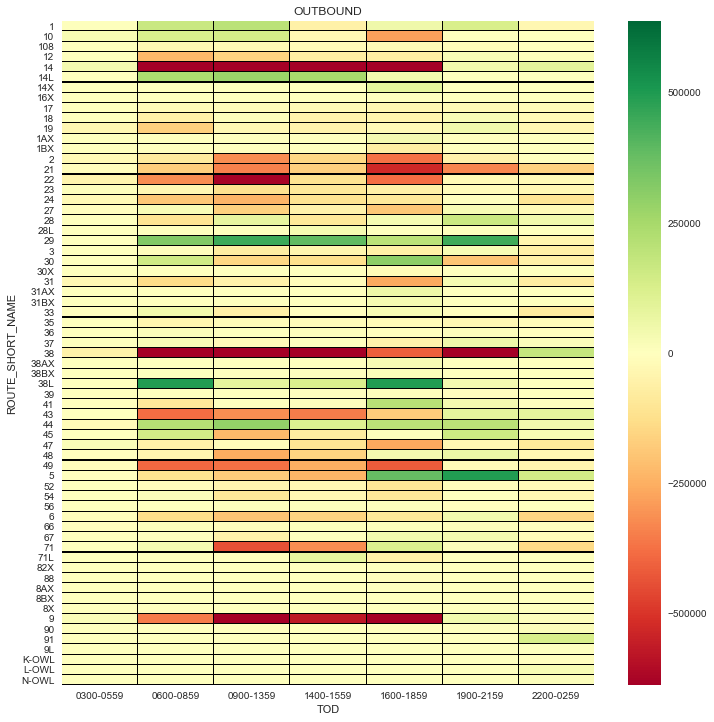

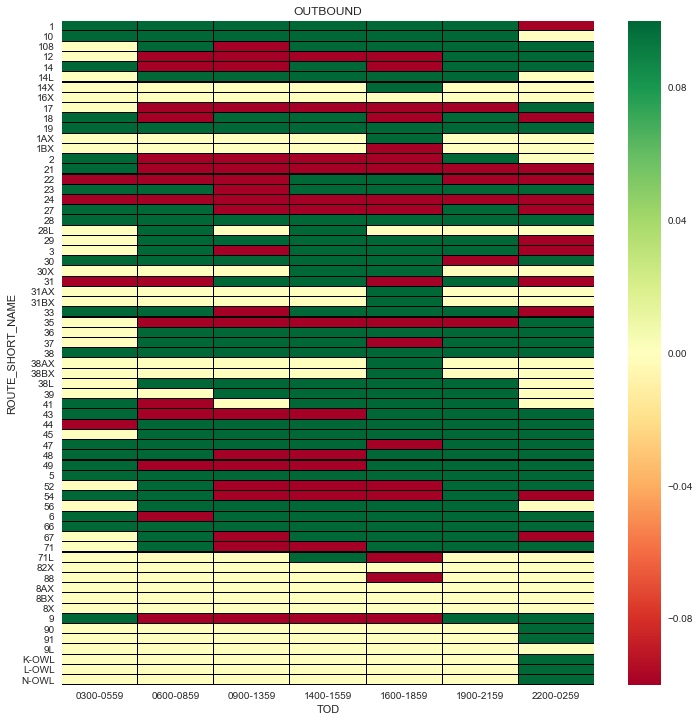

In [291]:
def create_heatmap2(df,direction):
    plt.figure(figsize =(10, 10))
    if direction == 1:
        plt.title('ROUTE ' + str(route) + ' (Inbound)')
        plt.tight_layout()
        Heatmap = sns.heatmap(df, robust = True, cmap = 'RdYlGn',annot = pivot2,
                              linecolor = 'black',linewidth = 0.1,cbar = True,square = False, 
                              xticklabels = True, yticklabels = True)
        
    elif direction == 0:
        plt.title('ROUTE ' + str(route) + ' (Outbound)')
        plt.tight_layout()
        Heatmap = sns.heatmap(df, robust = True, cmap = 'RdYlGn',annot = pivot2,
                              linecolor = 'black',linewidth = 0.1,cbar = True,square = False, 
                              xticklabels = True, yticklabels = True)

    else:
        print('Bad Direction!')

    return Heatmap
 

C:\Anaconda\lib\site-packages\matplotlib\colors.py:859: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
C:\Anaconda\lib\site-packages\matplotlib\colors.py:494: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


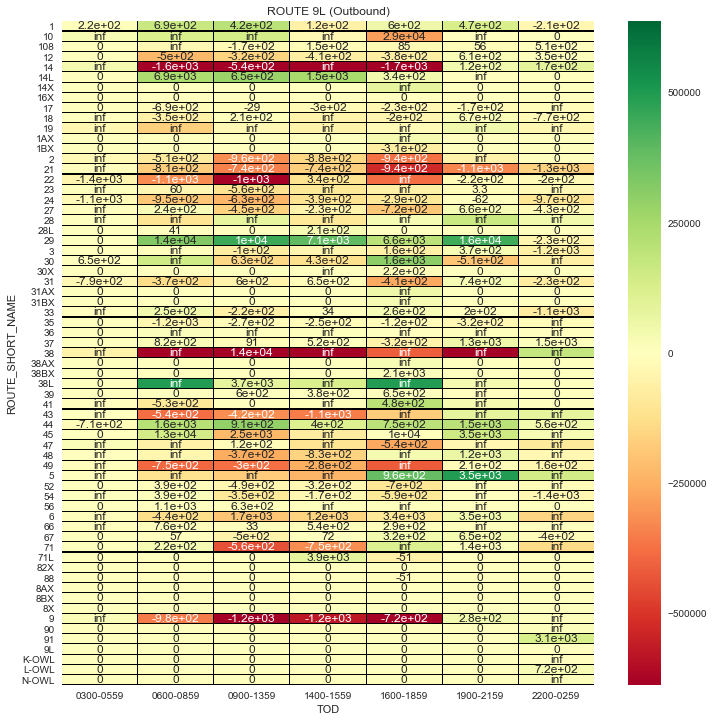

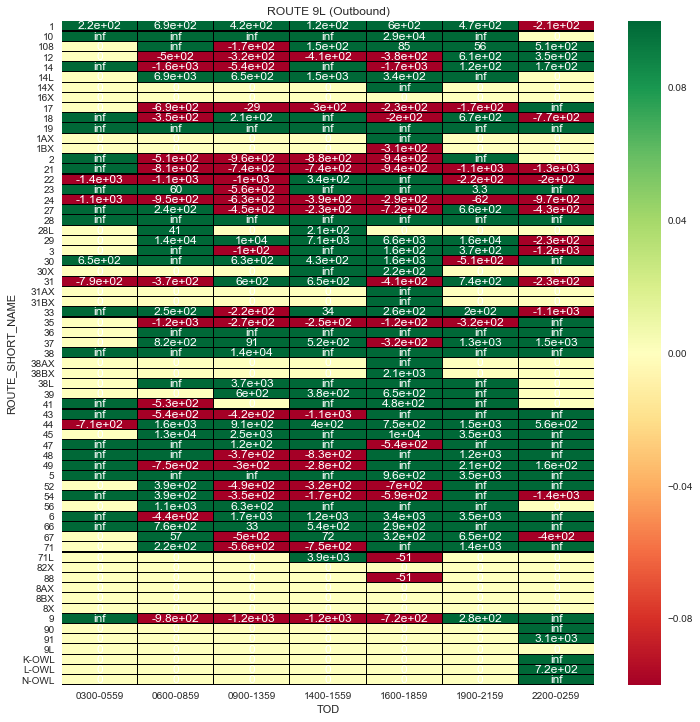

In [298]:
pivot = dir_df.pivot_table(values = 'LOAD_DIFF',index = 'ROUTE_SHORT_NAME',
                                      columns = 'TOD',aggfunc = 'sum',margins = False, fill_value = 0)
pivot2 = dir_df.pivot_table(values = 'LOAD_PDIFF',index = 'ROUTE_SHORT_NAME',
                      columns = 'TOD',aggfunc = 'sum',margins = False, fill_value = 0)                      
heatmap = create_heatmap2(pivot,direction)
heatmap2 = create_heatmap2(pivot2,direction)
figure = heatmap.get_figure()
figure2 = heatmap2.get_figure()

In [276]:
pivot2

TOD,0300-0559,0600-0859,0900-1359,1400-1559,1600-1859,1900-2159,2200-0259
ROUTE_SHORT_NAME,,,,,,,
1,216.075041,6.922585e+02,4.179026e+02,116.095416,6.006357e+02,4.687687e+02,-213.754155
10,inf,inf,inf,inf,2.933978e+04,inf,0.000000
108,0.000000,inf,-1.666779e+02,152.934638,8.545253e+01,5.607244e+01,510.612728
12,0.000000,-4.990962e+02,-3.223039e+02,-405.016440,-3.808737e+02,6.072440e+02,347.245702
14,inf,-1.648133e+03,-5.379802e+02,inf,-1.731769e+03,1.156670e+02,174.924345
14L,0.000000,6.912915e+03,6.467465e+02,1451.760094,3.419841e+02,inf,0.000000
14X,0.000000,0.000000e+00,0.000000e+00,0.000000,inf,0.000000e+00,0.000000
16X,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000
17,0.000000,-6.924110e+02,-2.904389e+01,-295.084993,-2.253595e+02,-1.725367e+02,inf


In [302]:
fig, ax = plt.subplots()

TypeError: unsupported operand type(s) for *: 'Figure' and 'int'

In [303]:
figure.add_subplot(figure2)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'Figure'